# **create_word_clouds**

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re, string
import pickle

In [2]:
from pymongo import MongoClient
client = MongoClient()
db = client.environment
sustainability_collection = db.sustainability

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#Add additional stop words in here:
word_cloud_stop_words = ['RT', 'rt', "’", "sustainability", "sustainable", "sustainabl", "sustain", "pilot", "license", "fly", "need"]

total_stop_words = stop_words + word_cloud_stop_words

In [4]:
def wordcloud_text(my_text, tokenizer, stemmer):
    
#   tokenizer = word_tokenize
#   print(my_text)
    words = re.sub(r"http\S+", "", my_text)                                   #remove hyperlinks
    words = re.sub(r"@[\w_]+","",words)                                       #remove Twitter username (kept for now)
    words = re.sub('[%s]'% re.escape(string.punctuation), '', words).lower()          #remove punctuation & lowercase
    words = ''.join([i for i in words if not i.isdigit()])                    #remove numbers
    words = word_tokenize(words)                                             #Tokenize words    

    cleaned_words = []
    
    for word in words:
        
        if word.lower().replace(' ','') not in total_stop_words:
#            word = stemmer.stem(word.lower())
            cleaned_words.append(word.lower())
        
    return ' '.join(cleaned_words)

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200 ,
        max_font_size=40, 
        scale=3,
        random_state=42,
        relative_scaling = 0
        
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [6]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])

tweets = []
for tweet in english_cursor:
    tweets.append(wordcloud_text(tweet['text'], tokenizer = None, stemmer = None))

In [7]:
words = []
for tweet in tweets:
    for word in ((word_tokenize(tweet))):
        words.append(word)

In [8]:
#show_wordcloud(words)

In [9]:
with open('hashtags.pickle','rb') as read_file:
    hashtags = pickle.load(read_file)

In [10]:
hashtag_list = []

for word in words:
    if word in hashtags:
        hashtag_list.append(word)

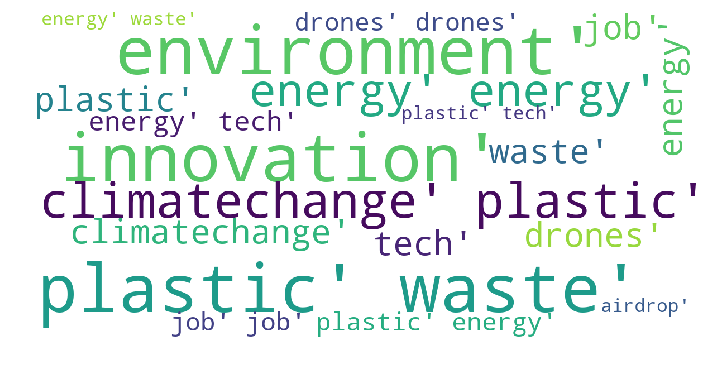

In [11]:
show_wordcloud(hashtag_list)

In [13]:
with open('tweet_df.pickle','rb') as read_file:
    tweet_df = pickle.load(read_file)

In [14]:
tweet_df.head()

,tweet,clusters,polarity,subjectivity
0,RT @angelurena: This visit concludes this week...,6,0.000000,0.00
1,Are you in Melbourne or Sydney? Join us at #SP...,2,0.500000,0.90
2,Why Vienna Does So Well on Quality-of-Life Ran...,6,0.000000,0.00
3,RT @APLShipping: APL achieved a 50.7% reductio...,6,0.000000,0.00
4,RT @AmazonWatch: “Hydroelectricity may appear ...,6,0.233333,0.85


In [15]:
def generate_wordcloud_cluster(cluster_num):
    cluster_tweets = tweet_df[tweet_df['clusters'] == cluster_num]['tweet']
    #print(cluster_tweets)
    cluster_words = []
    for tweet in cluster_tweets:
        cluster_words.append(wordcloud_text(tweet, tokenizer = None, stemmer = None))
    return show_wordcloud(cluster_words)

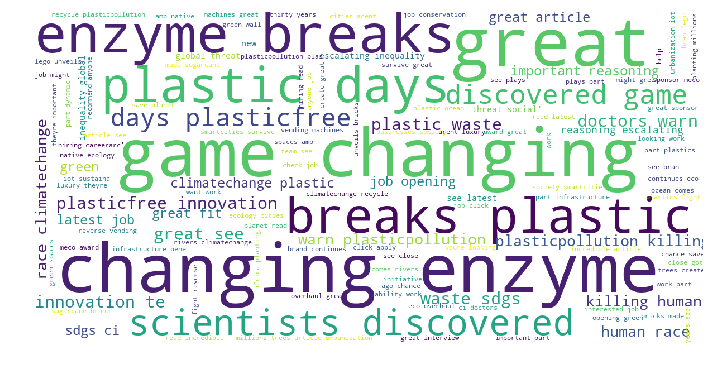

In [16]:
generate_wordcloud_cluster(0)

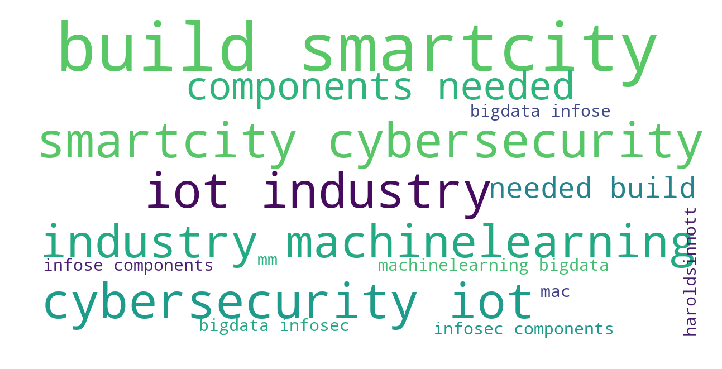

In [17]:
generate_wordcloud_cluster(1)

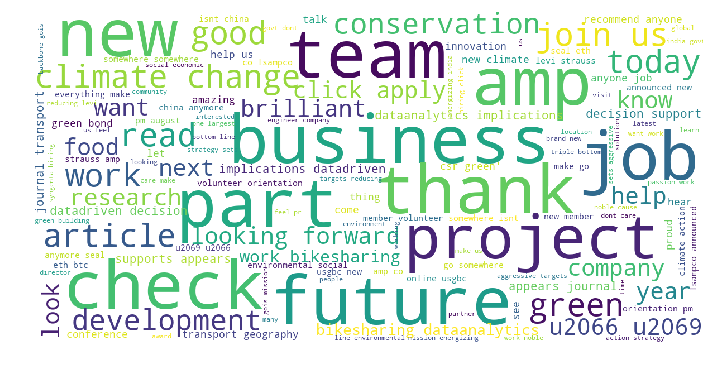

In [18]:
generate_wordcloud_cluster(2)

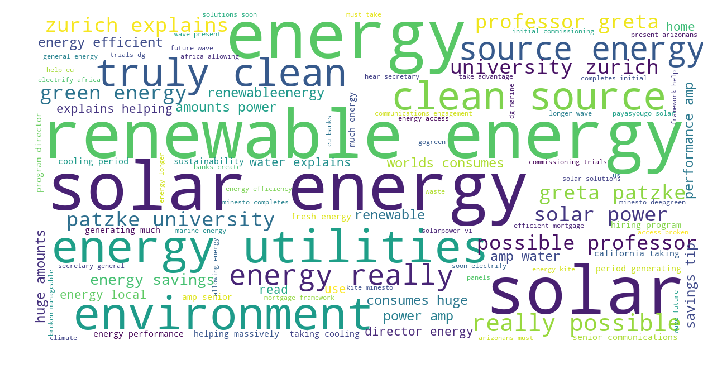

In [19]:
generate_wordcloud_cluster(3)

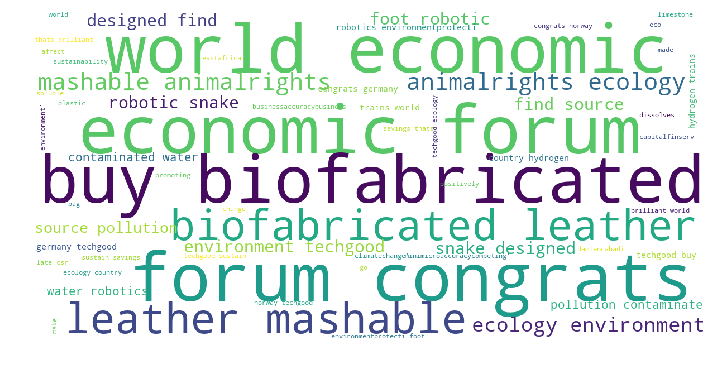

In [20]:
generate_wordcloud_cluster(4)

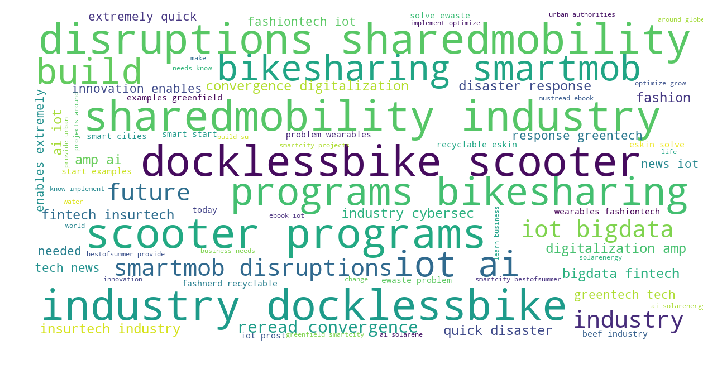

In [21]:
generate_wordcloud_cluster(5)

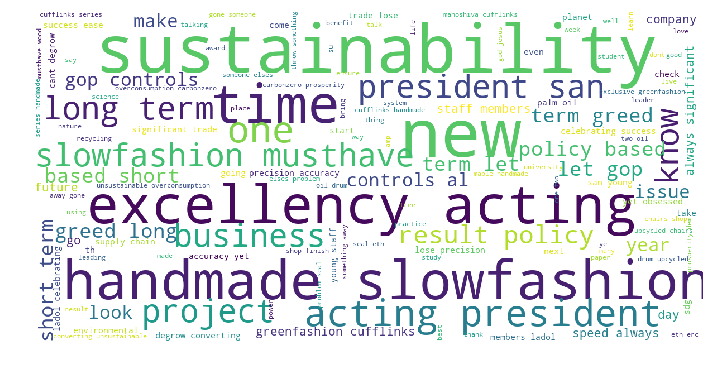

In [22]:
generate_wordcloud_cluster(6)

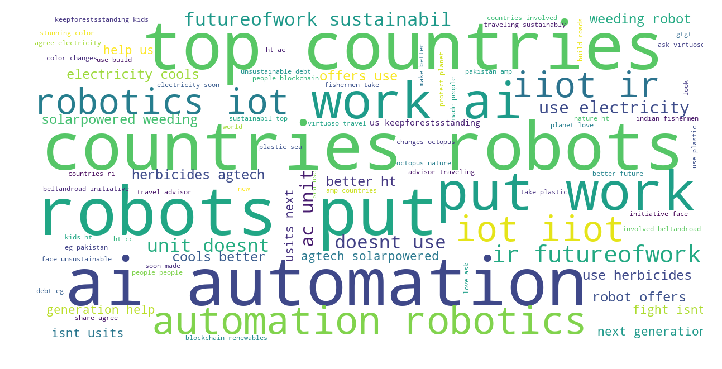

In [23]:
generate_wordcloud_cluster(7)

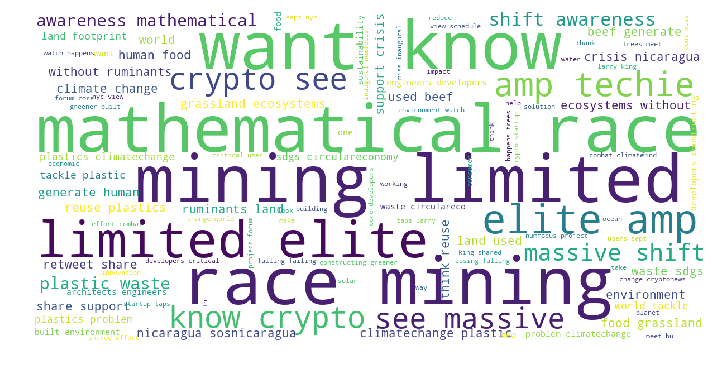

In [24]:
generate_wordcloud_cluster(8)

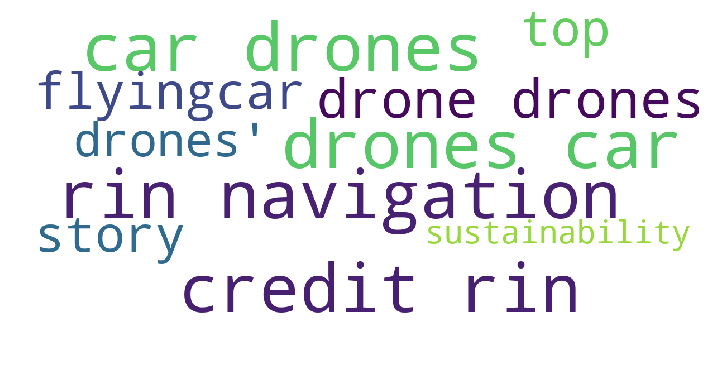

In [25]:
generate_wordcloud_cluster(9)

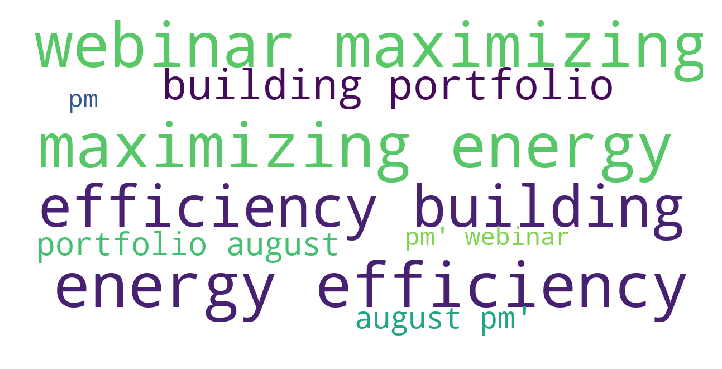

In [26]:
generate_wordcloud_cluster(10)

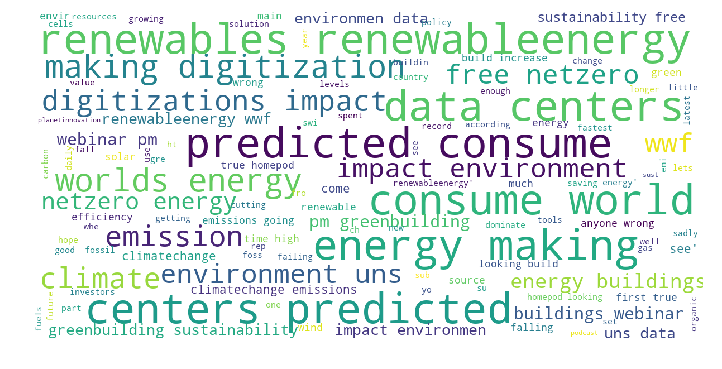

In [27]:
generate_wordcloud_cluster(11)

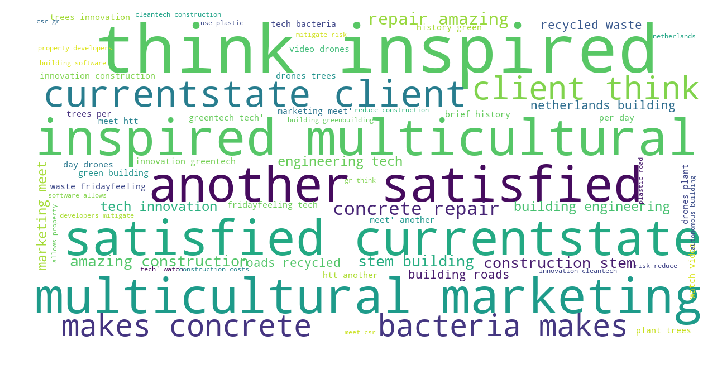

In [28]:
generate_wordcloud_cluster(12)

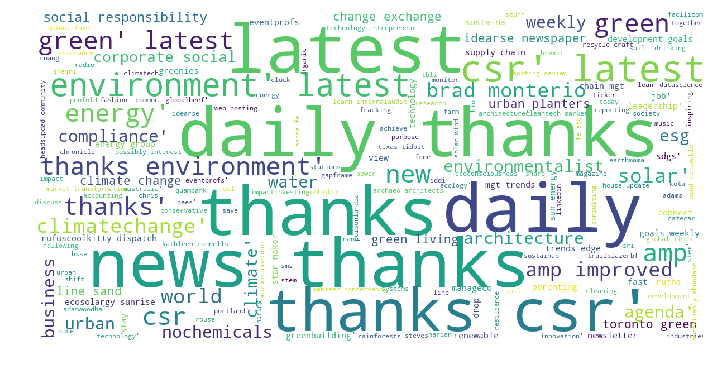

In [29]:
generate_wordcloud_cluster(13)

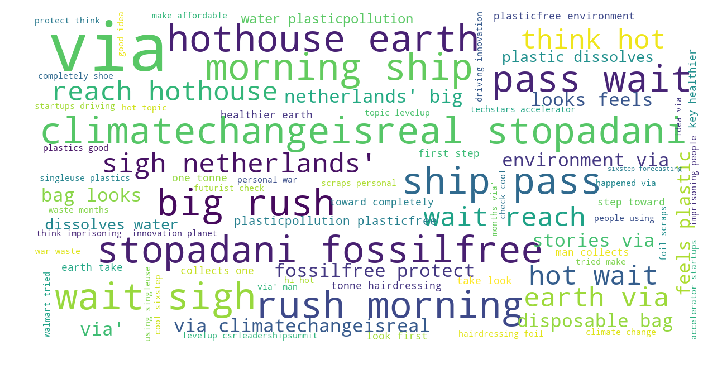

In [30]:
generate_wordcloud_cluster(14)

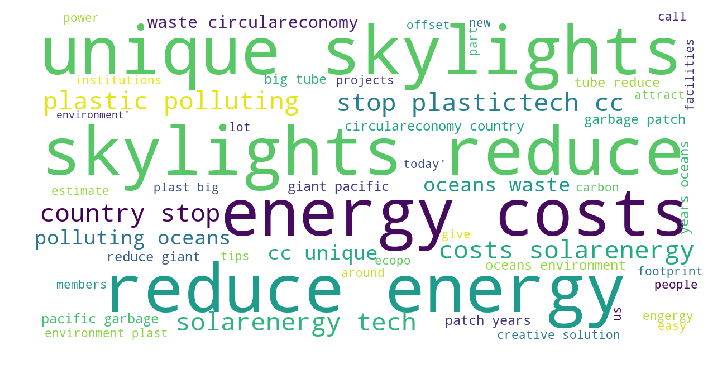

In [31]:
generate_wordcloud_cluster(15)

In [32]:
import pandas as pd

In [33]:
cluster_names = ['Plastic Eating Enzyme', 'Smart Cities', 'Green Businesses', 'Renewable Energy',
                 'Economic Sustainability', 'Sustainable Communities', 'Daily Sustainability', 
                 'Robotics & Sustainability', 'Sustainable Cryptocurrency', 'Drones & Sustainability', 
                 'Energy Efficiency', 'Environmental Impact', 'Future of Sustainability', 
                 'Corporate Social Responsibility', 'Climate Change', 'Solar Energy']
                 

In [34]:
clust_names_df = pd.DataFrame({'clust_nums' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'clust_names' : cluster_names})

In [35]:
clust_names_df

,clust_nums,clust_names
0,0,Plastic Eating Enzyme
1,1,Smart Cities
2,2,Green Businesses
3,3,Renewable Energy
4,4,Economic Sustainability
5,5,Sustainable Communities
6,6,Daily Sustainability
7,7,Robotics & Sustainability
8,8,Sustainable Cryptocurrency
9,9,Drones & Sustainability


In [36]:
with open ('clust_names.pickle', 'wb') as to_write:
    pickle.dump(clust_names_df, to_write)